In [53]:
import albumentations as A
import random
import cv2

%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
from matplotlib import pyplot as plt

## albumentation test

### config augmentation pipeline

In [54]:
transform = A.Compose([
    A.RandomCrop(width=256, height=256,p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomRotate90(),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.3), contrast_limit=(-0.2, 0.3), p=0.5),
    A.RandomResizedCrop(height=256, width=256, scale=(0.3, 1.0),p = 0.5),
    A.OneOf([
        A.HueSaturationValue(p=0.3),
        A.ChannelShuffle(p=0.3),
        A.CLAHE(p=0.3)
    ], p=0.5)
])
random.seed(42)

### make multiple images with aug_apply

In [55]:
def show_images(images,masks, labels):
    fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(20, 8))
    for i in range(10):
        axs[i].imshow(images[i])
        # axs[i].imshow(masks[i])
        axs[i].set_title(labels[i])

# 원본 이미지를 입력받아 4개의 augmentation 적용하여 시각화 
def aug_apply(image,mask,label, aug):
    image_list = [image]
    mask_list = [mask]
    label_list = ['origin']

    for i in range(10):
        aug_image, aug_mask = aug(image=image, mask = mask)['image'] , aug(image=image, mask = mask)['mask'] 
        image_list.append(aug_image)
        mask_list.append(aug_mask)
        label_list.append(label)

    show_images(image_list,mask_list,label_list)

In [56]:
image = cv2.imread("images/000000248112.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mask = cv2.imread("images/mask/000000248112.png")

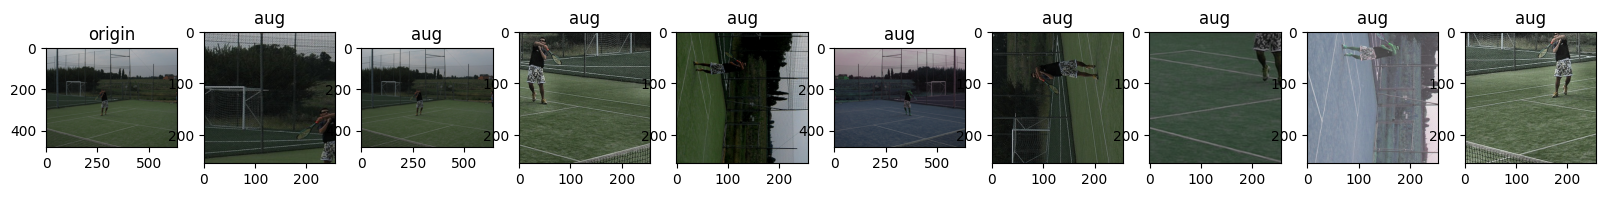

In [57]:
aug_apply(image,mask,label = "aug",aug = transform)

### mask -> binary mask -> coco segmentation form

In [114]:
import numpy as np
import cv2

from modules.post_proccessing import *

masked = cv2.imread("images/mask/000000408774.png")
masked = cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY)

binary_mask = np.where(masked > 0,255,0)
_, segmentations = create_sub_mask_annotation(binary_mask)
# json_data = create_coco_dict_seg(binary_mask,segmentations,result["BBOXES"][i],result["CLASSES"][i],i)
segmentations

[[-1.0,
  105.00196078431372,
  3.0,
  105.00196078431372,
  3.9980392156862745,
  110.0,
  10.0,
  113.00196078431372,
  14.998039215686275,
  120.0,
  15.998039215686276,
  128.0,
  10.998039215686275,
  140.0,
  10.998039215686275,
  145.0,
  13.0,
  150.00196078431372,
  20.0,
  152.00196078431372,
  24.998039215686276,
  157.0,
  27.998039215686276,
  164.0,
  26.998039215686276,
  191.0,
  24.998039215686276,
  201.0,
  26.998039215686276,
  225.0,
  26.998039215686276,
  255.0,
  21.998039215686276,
  267.0,
  21.998039215686276,
  273.0,
  25.998039215686276,
  290.0,
  25.998039215686276,
  304.0,
  28.998039215686276,
  317.0,
  28.0,
  328.9980392156863,
  0.0019607843137254832,
  328.0,
  -1.0,
  105.00196078431372],
 [175.96045751633986,
  179.03758169934642,
  175.00196078431372,
  203.0,
  173.00196078431372,
  209.0,
  181.0,
  211.99803921568628,
  183.99803921568628,
  209.0,
  184.99803921568628,
  200.0,
  188.0,
  195.99803921568628,
  190.00196078431372,
  197.0,


In [6]:
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']

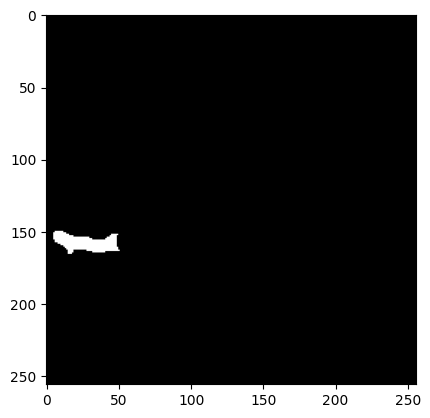

In [7]:

cv2.imwrite("images/augmented/000000408774.jpg",transformed_image)
# plt.imshow(transformed_image)
plt.imshow(transformed_mask)
plt.show()